# RCA

culmen_length_mm: culmen length (mm)

culmen_depth_mm: culmen depth (mm)

flipper_length_mm: flipper length (mm)

body_mass_g: body mass (g)

sex: penguin sex

In [10]:
import time
from glob import glob
import os 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import KernelPCA, PCA
import umap

import warnings
warnings.filterwarnings("ignore")



print('Виртуальное окружение')
!which python 
# Текущее положение
print('\nТекущее положение: ')
path_1 = os.getcwd()
print(path_1)


Виртуальное окружение
/home/maksim/anaconda3/envs/rapids-25.02/bin/python

Текущее положение: 
/home/maksim/develops/python/MAKSIM/ML/9_RCA


## 1) Загрузка

In [11]:

train_df = pd.read_csv('train.csv')


print('\nРазмер данных: ', train_df.shape)

print(train_df.head().to_string(index=False))



Размер данных:  (344, 5)
 culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g    sex
             39.1             18.7              181.0       3750.0   MALE
             39.5             17.4              186.0       3800.0 FEMALE
             40.3             18.0              195.0       3250.0 FEMALE
              NaN              NaN                NaN          NaN    NaN
             36.7             19.3              193.0       3450.0 FEMALE


## 2) Анализ

In [12]:
# EDA: Исследование данных
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         214.014620  4201.754386
std            5.459584         1.974793         260.558057   801.954536
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  405

In [13]:
print("\nПропуски:")
print(train_df.isnull().sum())
print("\nУникальные значения:")
print(train_df['sex'].unique())


Пропуски:
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Уникальные значения:
['MALE' 'FEMALE' nan '.']


In [14]:
# Удаление некорректных значений в столбце 'sex'
train_df = train_df[train_df['sex'].isin(['MALE', 'FEMALE'])]
print('\nРазмер данных: ', train_df.shape)
print("\nПропуски:")
print(train_df.isnull().sum())
print("\nУникальные значения:")
print(train_df['sex'].unique())
print(train_df)


Размер данных:  (334, 5)

Пропуски:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Уникальные значения:
['MALE' 'FEMALE']
     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0                39.1             18.7              181.0       3750.0    MALE
1                39.5             17.4              186.0       3800.0  FEMALE
2                40.3             18.0              195.0       3250.0  FEMALE
4                36.7             19.3              193.0       3450.0  FEMALE
5                39.3             20.6              190.0       3650.0    MALE
..                ...              ...                ...          ...     ...
338              47.2             13.7              214.0       4925.0  FEMALE
340              46.8             14.3              215.0       4850.0  FEMALE
341              50.4             15.7              222.0       5750.0    MALE
342  

In [15]:
print("\nПропуски:")
print(train_df.isnull().sum())
print("\nУникальные значения:")
print(train_df['flipper_length_mm'].unique())


Пропуски:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Уникальные значения:
[ 181.  186.  195.  193.  190. 5000.  182.  191. -132.  185.  197.  184.
  194.  174.  180.  189.  187.  183.  172.  178.  188.  196.  200.  192.
  198.  202.  205.  208.  203.  199.  176.  210.  201.  212.  206.  207.
  211.  230.  218.  215.  219.  209.  214.  216.  213.  217.  221.  222.
  220.  225.  224.  231.  229.  223.  228.  226.]


In [16]:
# Удаление некорректных значений в столбце 'flipper_length_mm'
train_df = train_df[(train_df['flipper_length_mm'] > 0) & (train_df['flipper_length_mm'] <= 300)]

print("\nУникальные значения:")
print(train_df['flipper_length_mm'].unique())


Уникальные значения:
[181. 186. 195. 193. 190. 182. 191. 185. 197. 184. 194. 174. 180. 189.
 187. 183. 172. 178. 188. 196. 200. 192. 198. 202. 205. 208. 203. 199.
 176. 210. 201. 212. 206. 207. 211. 230. 218. 215. 219. 209. 214. 216.
 213. 217. 221. 222. 220. 225. 224. 231. 229. 223. 228. 226.]


                   Доля пропусков  Максимум  Минимум      Среднее  Медиана      Дисперсия  Квантиль 0.1  Квантиль 0.9  Квартиль 1  Квартиль 3
body_mass_g                   0.0    6300.0   2700.0  4206.475904   4025.0  650218.509992       3300.00        5445.0      3550.0    4781.250
culmen_depth_mm               0.0      21.5     13.1    17.153012     17.3       3.842680         14.31          19.5        15.6      18.700
culmen_length_mm              0.0      59.6     32.1    44.021084     44.7      29.729343         36.61          50.8        39.5      48.625
flipper_length_mm             0.0     231.0    172.0   200.975904    197.0     197.008481        185.00         221.0       190.0     213.000
sex                           0.0       NaN      NaN          NaN      NaN            NaN           NaN           NaN         NaN         NaN


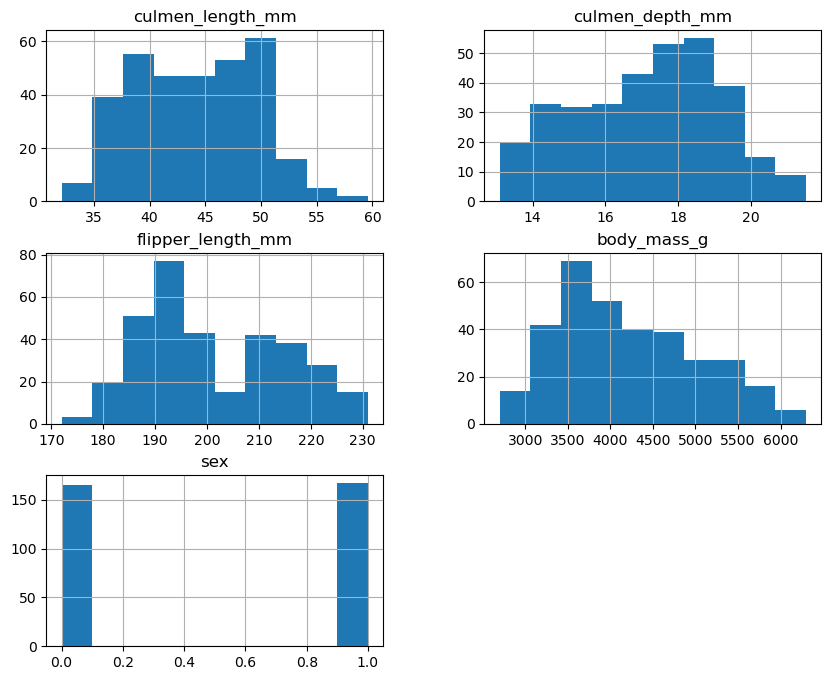

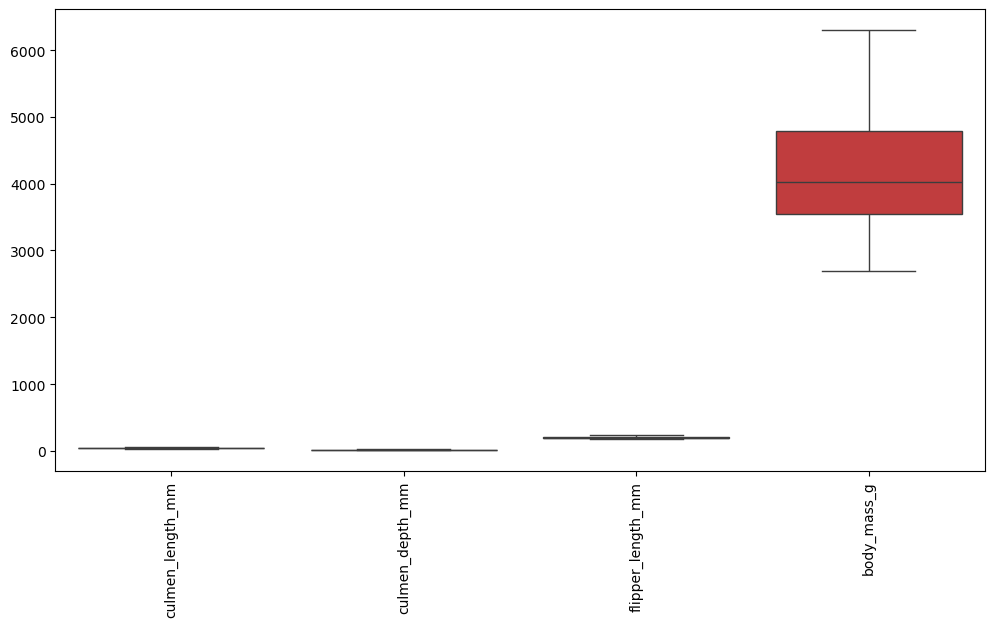

In [17]:
# Оставляем только числовые столбцы
numeric_data = train_df.select_dtypes(include=[np.number])

# Вычисляем статистики
statistics = {
    "Доля пропусков": train_df.isnull().mean(),
    "Максимум": numeric_data.max(),
    "Минимум": numeric_data.min(),
    "Среднее": numeric_data.mean(),
    "Медиана": numeric_data.median(),
    "Дисперсия": numeric_data.var(),
    "Квантиль 0.1": numeric_data.quantile(0.1),
    "Квантиль 0.9": numeric_data.quantile(0.9),
    "Квартиль 1": numeric_data.quantile(0.25),
    "Квартиль 3": numeric_data.quantile(0.75),
}

statistics_df = pd.DataFrame(statistics)
print(statistics_df.to_string())
# Удаление строк с пропущенными значениями
train_df = train_df.dropna()
# Кодирование категориального признака
train_df['sex'] = LabelEncoder().fit_transform(train_df['sex'])
# Визуализация распределения признаков
train_df.hist(figsize=(10, 8))
plt.show()
# Обнаружение выбросов с помощью boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df.drop(columns=['sex']))
plt.xticks(rotation=90)
plt.show()

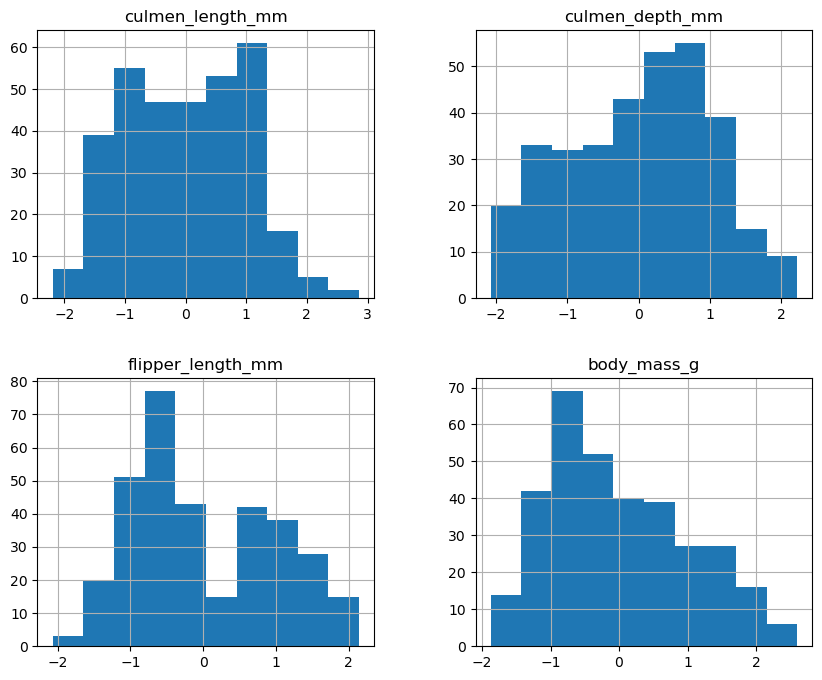

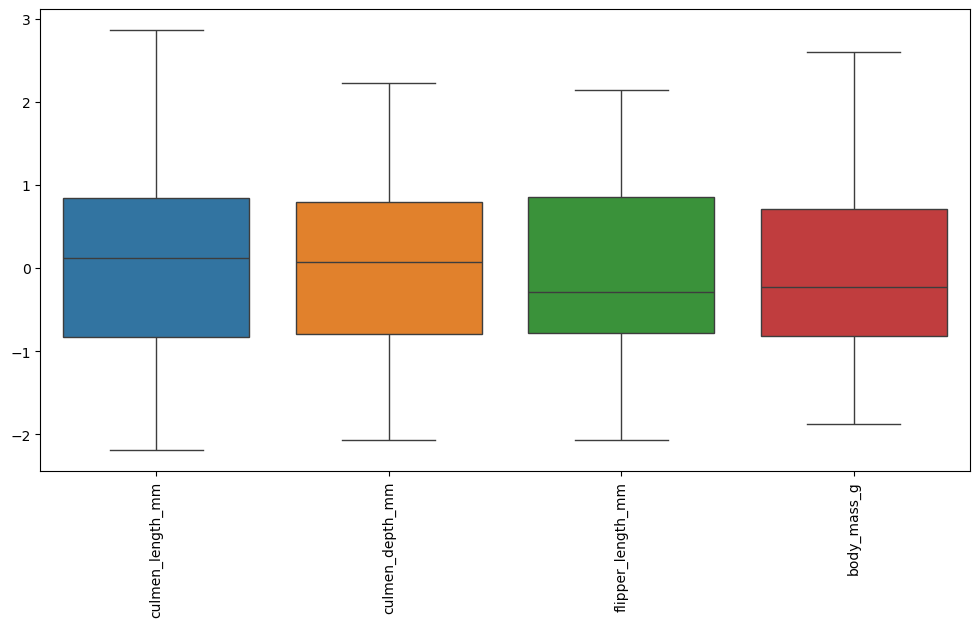

In [18]:
# Нормализация данных
scaler = StandardScaler()
y = train_df['sex']
X_scaled = scaler.fit_transform(train_df.drop(columns=['sex']))

# Преобразуем X_scaled обратно в DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=train_df.drop(columns=['sex']).columns)

# Визуализация распределения признаков
X_scaled_df.hist(figsize=(10, 8))
plt.show()

# Обнаружение выбросов с помощью boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_scaled_df)
plt.xticks(rotation=90)
plt.show()


## 3) Метод PCA

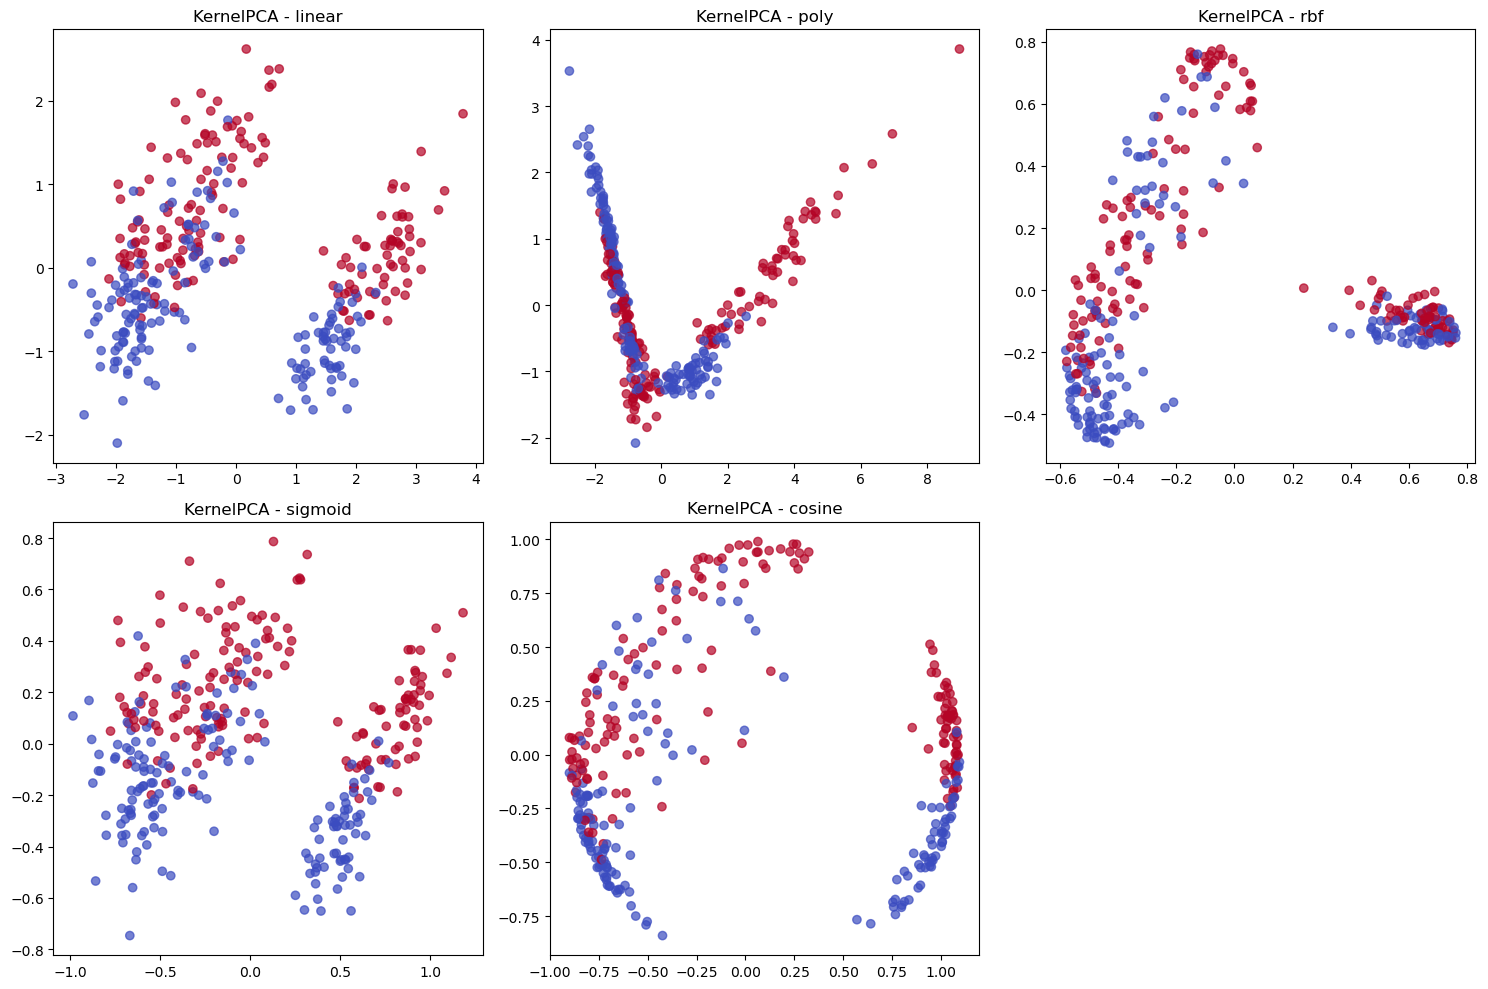

In [20]:
# Перебор ядерных функций для KernelPCA
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']
plt.figure(figsize=(15, 10))
for i, kernel in enumerate(kernels, 1):
    kpca = KernelPCA(n_components=2, kernel=kernel)
    X_kpca = kpca.fit_transform(X_scaled)
    plt.subplot(2, 3, i)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=train_df['sex'], cmap='coolwarm', alpha=0.7)
    plt.title(f'KernelPCA - {kernel}')

plt.tight_layout()
plt.show()


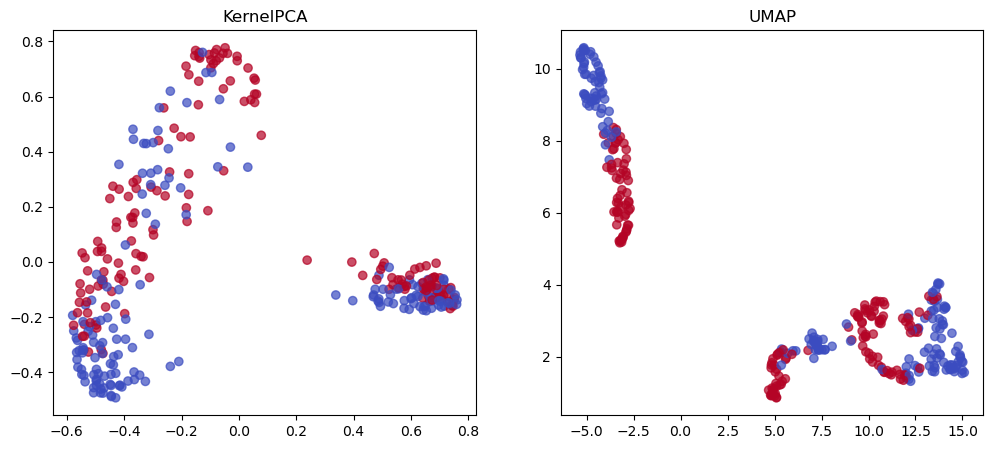

In [21]:
# Снижение размерности с помощью KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_scaled)


# Снижение размерности с помощью UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Визуализация результатов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=train_df['sex'], cmap='coolwarm', alpha=0.7)
plt.title('KernelPCA')
plt.subplot(1, 2, 2)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=train_df['sex'], cmap='coolwarm', alpha=0.7)
plt.title('UMAP')
plt.show()

## 5) Линейное ядро

In [22]:
# KernelPCA с линейным ядром
kpca_linear = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
pca_linear = kpca_linear.fit_transform(X_scaled)

# Вычисление дисперсии
explained_variance = np.var(pca_linear, axis=0)
total_variance = np.var(X_scaled, axis=0).sum()
lost_variance = 1 - (explained_variance.sum() / total_variance)
print(f'Объясненная дисперсия (linear kernel): {explained_variance}')
print(f'Потерянная дисперсия: {lost_variance:.4f}')

Объясненная дисперсия (linear kernel): [2.74853377 0.78566255]
Потерянная дисперсия: 0.1165


In [23]:
kpca_linear = PCA(n_components=2)
pca_linear2 = kpca_linear.fit_transform(X_scaled)

# Вычисление дисперсии
explained_variance = np.var(pca_linear2, axis=0)
total_variance = np.var(X_scaled, axis=0).sum()
lost_variance = 1 - (explained_variance.sum() / total_variance)
print(f'Объясненная дисперсия (linear kernel): {explained_variance}')
print(f'Потерянная дисперсия: {lost_variance:.4f}')

Объясненная дисперсия (linear kernel): [2.74853377 0.78566255]
Потерянная дисперсия: 0.1165


In [24]:
print("Дисперсия: ", total_variance)

Дисперсия:  4.0


In [25]:
pca = PCA(n_components = 2)
XPCAreduced = pca.fit_transform(X_scaled)
# Расчет сохраненной и потерянной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance_ratio)
lost_variance = 1 - total_explained_variance

print(explained_variance_ratio)
print(total_explained_variance)
print(f'Потерянная дисперсия: {lost_variance:.4f}')

[0.68713344 0.19641564]
0.8835490785942348
Потерянная дисперсия: 0.1165


Дисперсия = 4.0  
  
1-я компонента  объясняет 2.74853377 единиц дисперсии, а вторая компонента объясняет 0.78566255. 
  
То есть основная часть вариации данных сосредоточена вдоль первой оси.   Соотношение  [0.68713344 0.19641564] 
   
Потерянная дисперсия: 0.1165

## 6)  t-SNE, UMAP


In [26]:
import numpy as np
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

umap_m = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_m.fit_transform(X_scaled)

def plot_results(X_embedded, title, subplot_col, fig):
    fig.add_trace(go.Scatter(
        x=X_embedded[:, 0], y=X_embedded[:, 1],
        mode='markers',
        marker=dict(color=y, colorscale='Jet', showscale=True, opacity=0.6),
        name=title
    ), row=1, col=subplot_col)
    fig.update_xaxes(title_text='Компонента 1', row=1, col=subplot_col)
    fig.update_yaxes(title_text='Компонента 2', row=1, col=subplot_col)
    fig.update_layout(title_text='Сравнение методов снижения размерности', showlegend=False)

fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('PCA', 't-SNE', 'UMAP'))

plot_results(X_pca, 'PCA', 1, fig)
plot_results(X_tsne, 't-SNE', 2, fig)
plot_results(X_umap, 'UMAP', 3, fig)

fig.show()


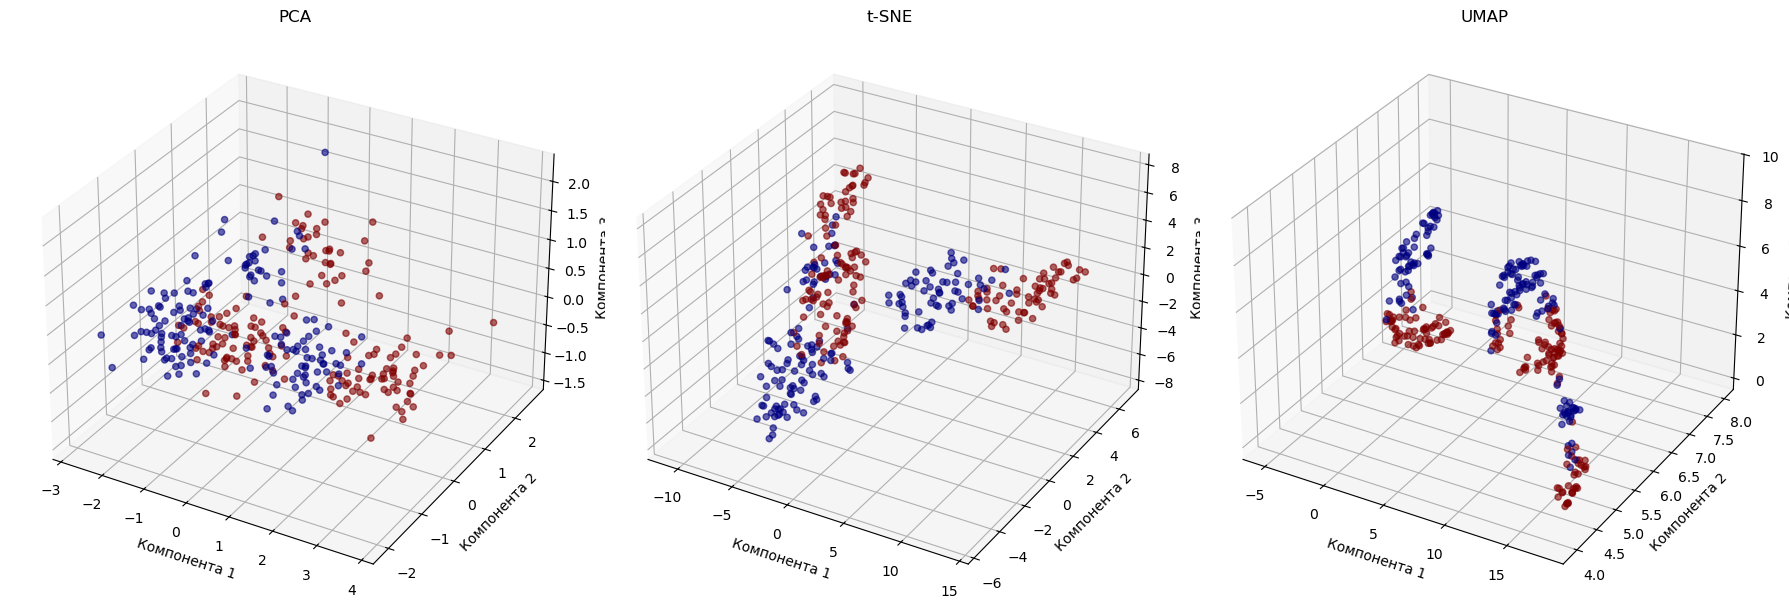

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

umap_model = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

def plot_results_3d(X_embedded, title, subplot_col, ax):
    ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y, cmap='jet', alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('Компонента 1')
    ax.set_ylabel('Компонента 2')
    ax.set_zlabel('Компонента 3')

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection='3d')
plot_results_3d(X_pca, 'PCA', 1, ax1)

ax2 = fig.add_subplot(132, projection='3d')
plot_results_3d(X_tsne, 't-SNE', 2, ax2)

ax3 = fig.add_subplot(133, projection='3d')
plot_results_3d(X_umap, 'UMAP', 3, ax3)

plt.tight_layout()
plt.show()


In [28]:
import numpy as np
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# UMAP
umap_model = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

def plot_results_3d(X_embedded, title, subplot_col, fig):
    fig.add_trace(go.Scatter3d(
        x=X_embedded[:, 0], y=X_embedded[:, 1], z=X_embedded[:, 2],
        mode='markers',
        marker=dict(color=y, colorscale='Jet', showscale=True, opacity=0.6),
        name=title
    ), row=1, col=subplot_col)
    fig.update_layout(title_text='Сравнение методов снижения размерности', showlegend=False)

#  интерактивный график
fig = sp.make_subplots(
    rows=1, cols=3, 
    subplot_titles=('PCA', 't-SNE', 'UMAP'),
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}]]  
)

plot_results_3d(X_pca, 'PCA', 1, fig)
plot_results_3d(X_tsne, 't-SNE', 2, fig)
plot_results_3d(X_umap, 'UMAP', 3, fig)

fig.show()


## Проверка обучения со снижением размерности

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        55
           1       0.86      0.96      0.91        45

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_kpca, y, test_size=0.3, random_state=42)

# Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        55
           1       0.67      0.78      0.72        45

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.74      0.73      0.73       100



### Снижение размерности показало результат хуже.